# Sea Level Rise AR5
Notebook environment to migrate netcdf files to CF compliant zarr & CoG

In [1]:
# Optional; code formatter, installed as jupyter lab extension
#%load_ext lab_black
# Optional; code formatter, installed as jupyter notebook extension
%load_ext nb_black

<IPython.core.display.Javascript object>

### Configure OS independent paths

In [37]:
# Import standard packages
import os
import pathlib
import sys
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import numpy.ma as ma
import rasterio
import rioxarray as rio
from datacube.utils.cog import write_cog

# Make root directories importable by appending root to path
cwd = pathlib.Path().resolve()
sys.path.append(os.path.dirname(cwd))

# Get root paths
home = pathlib.Path().home()
root = home.root
tmp_dir = home.joinpath("data", "tmp")

# Import custom functionality
from etl import p_drive
from etl.CF_compliancy_checker import check_compliancy, save_compliancy

# Define (local and) remote drives
coclico_data_dir = p_drive.joinpath("11205479-coclico", "FASTTRACK_DATA")

# Workaround to the Windows OS (10) udunits error after installation of cfchecker: https://github.com/SciTools/iris/issues/404
os.environ["UDUNITS2_XML_PATH"] = str(
    home.joinpath(  # change to the udunits2.xml file dir in your Python installation
        r"Anaconda3\pkgs\udunits2-2.2.28-h892ecd3_0\Library\share\udunits\udunits2.xml"
    )
)

# use local or remote data dir
use_local_data = False
ds_dirname = "18_AR5_SLP_IPCC"

if use_local_data: 
    ds_dir = tmp_dir.joinpath(ds_dirname)
else: 
    ds_dir = coclico_data_dir.joinpath(ds_dirname)

if not ds_dir.exists():
    raise FileNotFoundError("Directory with data does not exist.")

# directory to export result (make if not exists)
cog_dir = ds_dir.joinpath("cog") # for checking CF compliancy
cog_dirs = ds_dir.joinpath("cogs") # for making all files CF compliant
cog_dir.mkdir(parents=True, exist_ok=True)

<IPython.core.display.Javascript object>

In [3]:
# Project paths & files (manual input)
ds_dir = coclico_data_dir.joinpath("18_AR5_SLP_IPCC")
ds_rcp26_path = ds_dir.joinpath("total-ens-slr-26-5.nc")
ds_rcp45_path = ds_dir.joinpath("total-ens-slr-45-5.nc")
ds_rcp85_path = ds_dir.joinpath("total-ens-slr-85-5.nc")
ds_out_file = "total-ens-slr"
CF_dir = coclico_data_dir.joinpath(r"CF")  # directory to save output CF check files

<IPython.core.display.Javascript object>

### Check CF compliancy original NetCDF files

In [4]:
# open datasets
ds_26rcp = xr.open_dataset(ds_rcp26_path)
ds_45rcp = xr.open_dataset(ds_rcp45_path)
ds_85rcp = xr.open_dataset(ds_rcp85_path)

# check original dataset
ds_26rcp

c:\Users\kras\AppData\Local\mambaforge\envs\coclico\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'totslr_ens' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\kras\AppData\Local\mambaforge\envs\coclico\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'totslr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\kras\AppData\Local\mambaforge\envs\coclico\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'loerr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\kras\AppData\Local\mambaforge\envs\coclico\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'hierr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\kras\AppData\Local\ma

<xarray.Dataset>
Dimensions:     (time: 94, bnds: 2, lat: 180, lon: 360, ens: 16)
Coordinates:
  * time        (time) object 2007-07-02 12:00:00 ... 2100-07-02 12:00:00
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds   (time, bnds) object ...
    totslr_ens  (ens, time, lat, lon) float32 ...
    totslr      (time, lat, lon) float32 ...
    loerr       (time, lat, lon) float32 ...
    hierr       (time, lat, lon) float32 ...
    modelname   (ens) |S16 ...
Attributes:
    history:     version 5, 27-March-2014
    contact:     mark.carson@zmaw.de
    references:  IPCC AR5 WGI, Chapter 13, and Chapter 13: Supplementary Mate...

<IPython.core.display.Javascript object>

In [5]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_rcp26_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [6]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_rcp26_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-26-5.nc': {'warnings': '1', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [7]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_rcp45_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [8]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_rcp45_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-45-5.nc': {'warnings': '5', 'errors': '4'}}


<IPython.core.display.Javascript object>

In [9]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_rcp85_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [10]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_rcp85_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-85-5.nc': {'warnings': '5', 'errors': '4'}}


<IPython.core.display.Javascript object>

### Make CF compliant alterations to the NetCDF files (dataset dependent)

In [11]:
# NetCDF variable and dimension alterations

# rename or swap dimension names, the latter in case the name already exists as coordinate
ds_26rcp = ds_26rcp.rename_dims(
    {"ens": "nmodelname", "bnds": "nv"}  # nv = number of vertices
)
ds_45rcp = ds_45rcp.rename_dims({"ens": "nmodelname", "bnds": "nv"})
ds_85rcp = ds_85rcp.rename_dims({"ens": "nmodelname", "bnds": "nv"})

# # rename variables, if necessary
# ds_26rcp = ds_26rcp.rename_vars({"modelname": "ensemble"})
# ds_45rcp = ds_45rcp.rename_vars({"modelname": "ensemble"})
# ds_85rcp = ds_85rcp.rename_vars({"modelname": "ensemble"})

# # set some data variables to coordinates to avoid duplication of dimensions in later stage
ds_26rcp = ds_26rcp.set_coords(["modelname", "time_bnds"])
ds_45rcp = ds_45rcp.set_coords(["modelname", "time_bnds"])
ds_85rcp = ds_85rcp.set_coords(["modelname", "time_bnds"])

# encoding settings
ds_26rcp.time_bnds.encoding[
    "_FillValue"
] = None  # xarray sets _FillValue automatically to None for float types, prevent this when needed
ds_45rcp.time_bnds.encoding[
    "_FillValue"
] = None  # xarray sets _FillValue automatically to None for float types, prevent this when needed
ds_85rcp.time_bnds.encoding[
    "_FillValue"
] = None  # xarray sets _FillValue automatically to None for float types, prevent this when needed

# construct equal dimensions in ensembles
# note, has to be partly manual as nensemble has to be indexed by ensemble strings
strip_ensembles = list(
    set([s.strip() for s in ds_85rcp["modelname"].astype(str).values]).difference(
        [s.strip() for s in ds_26rcp["modelname"].astype(str).values]
    )
)  # remove these at correct positions in the data from RCP45 & RCP85
strip_ensembles_idx = [
    idx
    for idx, j in enumerate(
        [s.strip() for s in ds_85rcp["modelname"].astype(str).values]
    )
    if j in strip_ensembles
]
ds_45rcp = ds_45rcp.drop_sel(
    nmodelname=strip_ensembles_idx
)  # remove indexed ensembles from RCP45
ds_85rcp = ds_85rcp.drop_sel(
    nmodelname=strip_ensembles_idx
)  # remove indexed ensembles from RCP85

# rework ensemble lists to get rid of excessive spaces
ds_26rcp["modelname"] = np.array(
    [s.strip() for s in ds_26rcp["modelname"].astype(str).values], dtype="S"
)
ds_26rcp = ds_26rcp.swap_dims({"modelname": "nmodelname"})
ds_45rcp["modelname"] = np.array(
    [s.strip() for s in ds_45rcp["modelname"].astype(str).values], dtype="S"
)
ds_45rcp = ds_45rcp.swap_dims({"modelname": "nmodelname"})
ds_85rcp["modelname"] = np.array(
    [s.strip() for s in ds_85rcp["modelname"].astype(str).values], dtype="S"
)
ds_85rcp = ds_85rcp.swap_dims({"modelname": "nmodelname"})
ds_26rcp["modelname"].attrs[
    "long_name"
] = "Model names in the same order as in totslr_ens var"
ds_45rcp["modelname"].attrs[
    "long_name"
] = "Model names in the same order as in totslr_ens var"
ds_85rcp["modelname"].attrs[
    "long_name"
] = "Model names in the same order as in totslr_ens var"

# info on all attributes
# !ncinfo -v totslr {ds_rcp26_path}

<IPython.core.display.Javascript object>

In [12]:
# concat datasets along new dimension with index values and name derived from pandas index object, if necessary
dataset = xr.concat([ds_26rcp, ds_45rcp, ds_85rcp], dim="nscenarios")
dataset = dataset.assign_coords(
    scenarios=("nscenarios", np.array(["RCP26", "RCP45", "RCP85"], dtype="S"))
)

# dataset = xr.concat(
#     [dataset_historical, dataset_45rcp, dataset_85rcp],
#     pd.Index(["historical", "rcp45", "rcp85"], name="scenarios"),
# )

# dataset["scenarios"].values.astype("U") # retrieve scenarios as string

<IPython.core.display.Javascript object>

In [13]:
# re-order shape of the data variables
ds_26rcp = ds_26rcp.transpose("time", "lat", "lon", "nv", "nmodelname")
ds_45rcp = ds_45rcp.transpose("time", "lat", "lon", "nv", "nmodelname")
ds_85rcp = ds_85rcp.transpose("time", "lat", "lon", "nv", "nmodelname")
dataset = dataset.transpose("nscenarios", "time", "lat", "lon", "nv", "nmodelname")

# add or change certain variable / coordinate attributes
dataset_attributes = {
    "scenarios": {"long_name": "climate scenarios"},
    "modelname": {"long_name": "Model names in the same order as in totslr_ens var"},
}  # specify custom (CF convention) attributes

# add / overwrite attributes
for k, v in dataset_attributes.items():
    try:
        dataset[k].attrs = dataset_attributes[k]
    except:
        continue

<IPython.core.display.Javascript object>

In [14]:
import json

# NetCDF attribute alterations by means of metadata template
f_global = open(ds_dir.joinpath("metadata_AR5_slp.json"))
meta_global = json.load(f_global)

ds_list = [ds_26rcp, ds_45rcp, ds_85rcp, dataset]
for i in ds_list:
    for attr_name, attr_val in meta_global.items():
        if attr_name == 'PROVIDERS':
            attr_val = json.dumps(attr_val)
        i.attrs[attr_name] = attr_val

    i.attrs['Conventions'] = "CF-1.8"

<IPython.core.display.Javascript object>

In [15]:
# drop the model dimension, will not be used in the platform. Use the average of the 16 models ('totslr')
ds_26rcp = ds_26rcp.drop_dims("nmodelname")
ds_45rcp = ds_45rcp.drop_dims("nmodelname")
ds_85rcp = ds_85rcp.drop_dims("nmodelname")
dataset = dataset.drop_dims("nmodelname")

# iterate over ds_list and replace variables by merging them together
ds_list_new = []
for i in [ds_26rcp, ds_45rcp, ds_85rcp, dataset]:

    # merge loerr, totslr & hierr as ensembles (5%, 50% 95%) and assign new variable called 'slr'
    i_arr = xr.concat([i["loerr"], i["totslr"], i["hierr"]], pd.Index([5.0, 50.0, 95.0], name="ensemble"))
    i = i.drop_vars(["loerr", "totslr", "hierr"])
    i = i.assign(slr = i_arr)

    # add / replace metadata names
    i["time_bnds"].attrs["long_name"] = "time boundaries"
    i["lon"].attrs["long_name"] = "longitude"
    i["lat"].attrs["long_name"] = "latitude"
    i["slr"].attrs["long_name"] = "sea level rise"
    i["ensemble"].attrs["long_name"] = "ensemble"
    i["ensemble"].attrs["units"] = "1"
    ds_list_new.append(i)

<IPython.core.display.Javascript object>

In [16]:
# check the xarray dataset, best practice is to have as many as possible bold dimensions (dimension == coordinate name).
# in this way, the Front-End can access the variable directly without having to index the variable first

# assign ds_list_new sets again to variables
ds_26rcp = ds_list_new[0]
ds_45rcp = ds_list_new[1]
ds_85rcp = ds_list_new[2]
dataset = ds_list_new[3]

dataset
# dataset["nscenarios"]

<xarray.Dataset>
Dimensions:    (time: 94, nv: 2, lat: 180, lon: 360, nscenarios: 3, ensemble: 3)
Coordinates:
  * time       (time) object 2007-07-02 12:00:00 ... 2100-07-02 12:00:00
    time_bnds  (time, nv) object 2007-01-01 00:00:00 ... 2101-01-01 00:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    scenarios  (nscenarios) |S5 b'RCP26' b'RCP45' b'RCP85'
  * ensemble   (ensemble) float64 5.0 50.0 95.0
Dimensions without coordinates: nv, nscenarios
Data variables:
    slr        (ensemble, nscenarios, time, lat, lon) float32 nan nan ... nan
Attributes: (12/24)
    history:             version 5, 27-March-2014
    contact:             mark.carson@zmaw.de
    references:          IPCC AR5 WGI, Chapter 13, and Chapter 13: Supplement...
    TITLE:               Sea level rise from AR5
    TITLE_ABBREVIATION:  ar5_slr
    DESCRIPTION:         These are the relative sea surface height (SSH) data...
    ...                  ...
    DOI:                 http://www.climatechange2013.org/images/report/WG1AR...
    LONG_NAME:           IPCC_AR5_SLR
    UNITS:               m
    COMMENT:             Here are the files which contain the ocean and ice c...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8

<IPython.core.display.Javascript object>

In [17]:
# save new .nc files
ds_26rcp.to_netcdf(path=str(ds_rcp26_path).replace(".nc", "_CF.nc"))
ds_45rcp.to_netcdf(path=str(ds_rcp45_path).replace(".nc", "_CF.nc"))
ds_85rcp.to_netcdf(path=str(ds_rcp85_path).replace(".nc", "_CF.nc"))
dataset.to_netcdf(path=ds_dir.joinpath(ds_out_file + "_CF.nc"))

<IPython.core.display.Javascript object>

### Check CF compliancy altered NetCDF files

In [18]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_rcp26_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [19]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_rcp26_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-26-5_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [20]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_rcp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [21]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_rcp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-45-5_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [22]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_rcp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [23]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_rcp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr-85-5_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [24]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=ds_dir.joinpath(ds_out_file + "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [25]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=ds_dir.joinpath(ds_out_file + "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\total-ens-slr_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

### write data to Zarr files (not used)

In [34]:
# export to zarr in write mode (to overwrite if exists)
#dataset.to_zarr(ds_dir.joinpath("%s.zarr" % ds_out_file), mode="w")

<IPython.core.display.Javascript object>

In [27]:
# check dataset
#ds_26rcp = xr.open_dataset(r"p:\11205479-coclico\FASTTRACK_DATA\18_AR5_SLP_IPCC\total-ens-slr-26-5_CF.nc")

<IPython.core.display.Javascript object>

### Write data to CoG (CF compliant)

In [28]:
# function to convert time format
import cftime
def cftime_to_pdts(t: cftime._cftime) -> pd.Timestamp:
    return pd.Timestamp(
        t.year,
        t.month,
        t.day,
        t.hour,
        t.minute,
        t.second,
        t.microsecond,
    )

<IPython.core.display.Javascript object>

#### Single CoG test

In [29]:
# check CoG for one set of params

# hard-coded input params
ENSEMBLE = 50.0 # selet ensemble
TIME = 0 # select timestep
VARIABLE = "slr" # select variable
RCP = 1 # select scenario

# open the dataset
ds_fp = ds_dir.joinpath(f"total-ens-slr_CF.nc")
ds = xr.open_dataset(ds_fp)

# make array 2d and fix time, spatial dimensions and crs
rds = ds.isel(time=TIME) 
time_bounds = [
    cftime_to_pdts(t).strftime("%Y-%m-%d") for t in rds.time_bnds.values
]
time_name = "_".join([t for t in time_bounds])

rds = rds.sel({"ensemble": ENSEMBLE, "nscenarios": RCP})[VARIABLE]
rds.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
if not rds.rio.crs:
    rds = rds.rio.write_crs("EPSG:4326")

# reset some attributes
rds["time"] = np.array(cftime_to_pdts(rds["time"].item()).strftime("%Y-%m-%d %H:%M:%S"), dtype="S")
rds["time"].attrs["standard_name"] = "time"
rds["time_bnds"] = np.array(time_name, dtype="S")
rds["time_bnds"].attrs["long_name"] = "time boundaries"

# convert to dataset
rdsd = rds.to_dataset()

# add all attributes (again)
for attr_name, attr_val in meta_global.items():
    if attr_name == 'PROVIDERS':
        attr_val = json.dumps(attr_val)
    if attr_name == "MEDIA_TYPE": # change media type to tiff, leave the rest as is
        attr_val = "IMAGE/TIFF"
    rdsd.attrs[attr_name] = attr_val

rdsd.attrs['Conventions'] = "CF-1.8"

# export file
rcp_str = rdsd["scenarios"].item().decode("utf-8") # fix scenario string
fname = f"{VARIABLE}_{rcp_str}_ens{int(ENSEMBLE)}_time{TIME}_CF.GeoTiff"
outpath = cog_dir.joinpath(fname)
rdsd.rio.to_raster(outpath, driver="GTiff")

<IPython.core.display.Javascript object>

In [30]:
# export to nc for quick CF compliancy check..
rdsd.to_netcdf(path=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")))
CF_dir = coclico_data_dir.joinpath(r"CF")

<IPython.core.display.Javascript object>

In [31]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [32]:
# save original CF compliancy
save_compliancy(cap, testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\18_AR5_SLP_IPCC\\cog\\slr_RCP45_ens50_time0_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

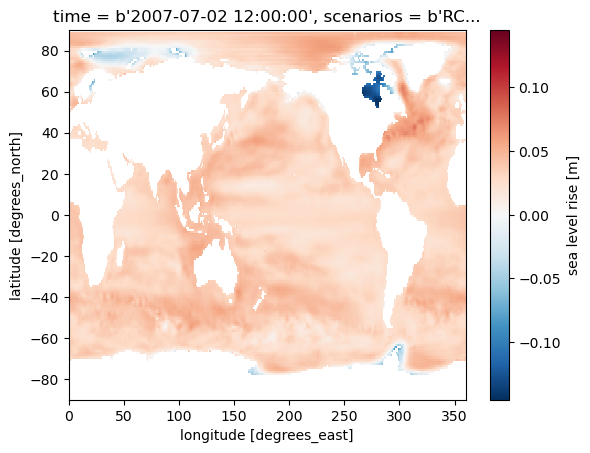

<IPython.core.display.Javascript object>

In [33]:
# plot to check output
import rioxarray as rio
data = rio.open_rasterio(outpath, masked=True)
# data.plot()
rds.plot()

#### Multiple CoGs

In [79]:
# do for all CoGs (CF compliant)

# open the dataset
ds_fp = ds_dir.joinpath(f"total-ens-slr_CF.nc")
ds = xr.open_dataset(ds_fp)

#ds = make_cf_compliant(ds)

# convert cf noleap yrs to datetime
#ds["time"] = ds.indexes["time"].to_datetimeindex()

for idx, scen in enumerate(ds["scenarios"].values):
    rcp = scen.decode("utf-8")

    # format rcp name for filenaming
    rcp_name = "rcp=%s"%rcp.strip("RCP")
    print(rcp_name)

    # extract list of data variables
    variables = set(ds.variables) - set(ds.dims) - set(ds.coords)

    #ds["modelname"] = ds.coords["modelname"].astype(str)

    ntimes = ds.dims["time"]
    for ntime in range(ntimes):
        ds2 = ds.copy()
        ds2 = ds2.isel({"time": ntime})

        # extract time boundaries for use in tif naming (dataset specific)
        time_bounds = [
            cftime_to_pdts(t).strftime("%Y-%m-%d") for t in ds2.time_bnds.values
        ]
        time_name = "_".join([t for t in time_bounds])

        for var_name in variables:
            # time bounds are extracted, so nv dim can be dropped, as tiff should be 2D or 3D.
            da = ds2.sel({"nscenarios": idx})[var_name]

            for idv, ens in enumerate(da["ensemble"].values):
                da2 = da.isel({"ensemble": idv})

                # add crs and spatial dims
                da2.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
                if not da2.rio.crs:
                    da2 = da2.rio.write_crs("EPSG:4326")

                # reset some variables and attributes (dataset specific)
                da2["time"] = np.array(cftime_to_pdts(da2["time"].item()).strftime("%Y-%m-%d %H:%M:%S"), dtype="S")
                da2["time"].attrs["standard_name"] = "time"
                da2["time_bnds"] = np.array(time_name, dtype="S")
                da2["time_bnds"].attrs["long_name"] = "time boundaries"

                # compose tif name
                fname = time_name + ".tif"
                blob_name = pathlib.Path(rcp_name, var_name + "_ens%s"%int(ens), fname)
                outpath = cog_dirs.joinpath(blob_name)

                # convert to dataset and save as geotiff & nc to check the CF compliancy
                # dads = da2.to_dataset()

                # # add all attributes (again)
                # for attr_name, attr_val in meta_global.items():
                #     if attr_name == 'PROVIDERS':
                #         attr_val = json.dumps(attr_val)
                #     if attr_name == "MEDIA_TYPE": # change media type to tiff, leave the rest as is
                #         attr_val = "IMAGE/TIFF"
                #     dads.attrs[attr_name] = attr_val

                # dads.attrs['Conventions'] = "CF-1.8"

                # save to .nc & geotiff
                # fname = f"{var_name}_{rcp}_ens{int(ens)}_time{ntime}_CF.GeoTiff"
                # outpath = cog_dir.joinpath(fname)
                # dads.rio.to_raster(outpath, driver="GTiff")
                # dads.to_netcdf(path=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")))
                # CF_dir = coclico_data_dir.joinpath(r"CF")
                
                # make parent dir if not exists
                outpath.parent.mkdir(parents=True, exist_ok=True)

                # set overwrite is false because tifs should be unique
                try:
                    write_cog(da2, fname=outpath, overwrite=False)
                except OSError as e:
                    continue

rcp=26
{'slr'}
rcp=45
{'slr'}
rcp=85
{'slr'}


<IPython.core.display.Javascript object>

In [77]:
# %%capture cap --no-stderr
# # check original CF compliancy

# check_compliancy(testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [78]:
# save original CF compliancy
# save_compliancy(cap, testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

<IPython.core.display.Javascript object>